In [6]:
# ruff: noqa: E501
import matplotlib.pyplot as plt
import numpy as np
from rock_physics_open.fluid_models.brine_model import brine_properties

from fmu.pem import INTERNAL_EQUINOR

In [7]:
salinity = np.linspace(30000.0, 50000.0, 100)
const_salinity = 35000.0 * np.ones_like(salinity)
temperature = np.linspace(20.0, 200, 100)
const_temp = 80.0 * np.ones_like(salinity)
pressure = np.linspace(10.0e6, 30.0e6, 100)
const_pressure = 20.0e6 * np.ones_like(salinity)
na1 = 100.0 * np.ones_like(salinity)
ca1 = np.zeros_like(salinity)
ka1 = np.zeros_like(salinity)

brine1 = brine_properties(const_temp, const_pressure, salinity, na1, ca1, ka1)
brine1t = brine_properties(temperature, const_pressure, const_salinity, na1, ca1, ka1)
brine1p = brine_properties(const_temp, pressure, const_salinity, na1, ca1, ka1)

na2 = 0.0 * np.ones_like(salinity)
ca2 = 100.0 * np.ones_like(salinity)
ka2 = 0.0 * np.ones_like(salinity)

brine2 = brine_properties(const_temp, const_pressure, salinity, na2, ca2, ka2)
brine2t = brine_properties(temperature, const_pressure, const_salinity, na2, ca2, ka2)
brine2p = brine_properties(const_temp, pressure, const_salinity, na2, ca2, ka2)

na3 = 0.0 * np.ones_like(salinity)
ca3 = 0.0 * np.ones_like(salinity)
ka3 = 100.0 * np.ones_like(salinity)

brine3 = brine_properties(const_temp, const_pressure, salinity, na3, ca3, ka3)
brine3t = brine_properties(temperature, const_pressure, const_salinity, na3, ca3, ka3)
brine3p = brine_properties(const_temp, pressure, const_salinity, na3, ca3, ka3)

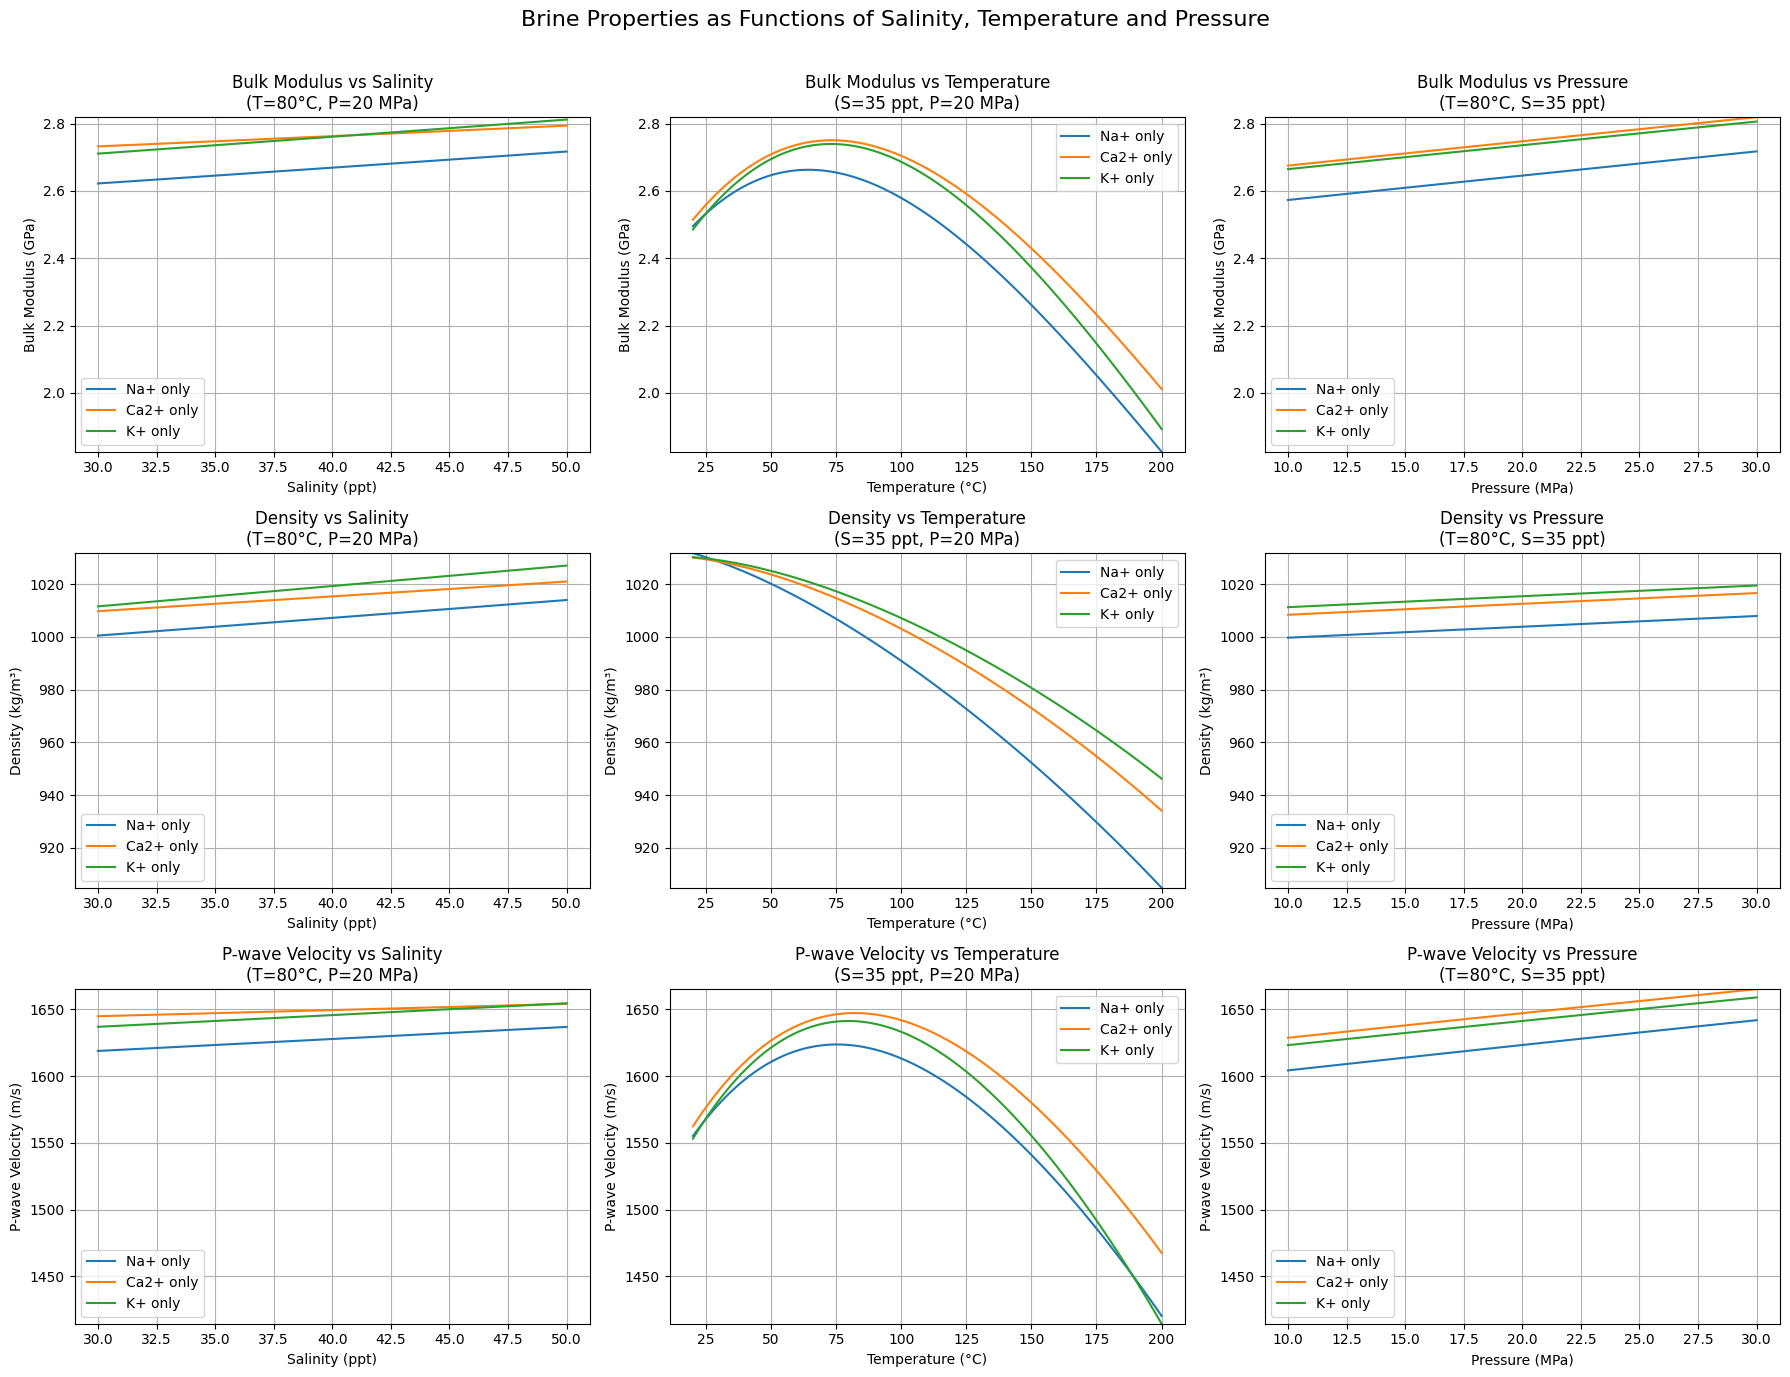

In [8]:
# Create a 3x3 grid of subplots (adding Vp row)
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

# Row 1: Bulk modulus (K)
# Salinity variation
axes[0, 0].plot(salinity / 1000, brine1[2] / 1e9, label="Na+ only")
axes[0, 0].plot(salinity / 1000, brine2[2] / 1e9, label="Ca2+ only")
axes[0, 0].plot(salinity / 1000, brine3[2] / 1e9, label="K+ only")
axes[0, 0].set_xlabel("Salinity (ppt)")
axes[0, 0].set_ylabel("Bulk Modulus (GPa)")
axes[0, 0].set_title("Bulk Modulus vs Salinity\n(T=80°C, P=20 MPa)")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Temperature variation
axes[0, 1].plot(temperature, brine1t[2] / 1e9, label="Na+ only")
axes[0, 1].plot(temperature, brine2t[2] / 1e9, label="Ca2+ only")
axes[0, 1].plot(temperature, brine3t[2] / 1e9, label="K+ only")
axes[0, 1].set_xlabel("Temperature (°C)")
axes[0, 1].set_ylabel("Bulk Modulus (GPa)")
axes[0, 1].set_title("Bulk Modulus vs Temperature\n(S=35 ppt, P=20 MPa)")
axes[0, 1].grid(True)
axes[0, 1].legend()

# Pressure variation
axes[0, 2].plot(pressure / 1e6, brine1p[2] / 1e9, label="Na+ only")
axes[0, 2].plot(pressure / 1e6, brine2p[2] / 1e9, label="Ca2+ only")
axes[0, 2].plot(pressure / 1e6, brine3p[2] / 1e9, label="K+ only")
axes[0, 2].set_xlabel("Pressure (MPa)")
axes[0, 2].set_ylabel("Bulk Modulus (GPa)")
axes[0, 2].set_title("Bulk Modulus vs Pressure\n(T=80°C, S=35 ppt)")
axes[0, 2].grid(True)
axes[0, 2].legend()

ydata = np.concatenate(
    [
        brine1[2] / 1e9,
        brine2[2] / 1e9,
        brine3[2] / 1e9,
        brine1t[2] / 1e9,
        brine2t[2] / 1e9,
        brine3t[2] / 1e9,
        brine1p[2] / 1e9,
        brine2p[2] / 1e9,
        brine3p[2] / 1e9,
    ]
)
ylim = [np.min(ydata), np.max(ydata)]
axes[0, 0].set_ylim(ylim)
axes[0, 1].set_ylim(ylim)
axes[0, 2].set_ylim(ylim)

# Row 2: Density
# Salinity variation
axes[1, 0].plot(salinity / 1000, brine1[1], label="Na+ only")
axes[1, 0].plot(salinity / 1000, brine2[1], label="Ca2+ only")
axes[1, 0].plot(salinity / 1000, brine3[1], label="K+ only")
axes[1, 0].set_xlabel("Salinity (ppt)")
axes[1, 0].set_ylabel("Density (kg/m³)")
axes[1, 0].set_title("Density vs Salinity\n(T=80°C, P=20 MPa)")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Temperature variation
axes[1, 1].plot(temperature, brine1t[1], label="Na+ only")
axes[1, 1].plot(temperature, brine2t[1], label="Ca2+ only")
axes[1, 1].plot(temperature, brine3t[1], label="K+ only")
axes[1, 1].set_xlabel("Temperature (°C)")
axes[1, 1].set_ylabel("Density (kg/m³)")
axes[1, 1].set_title("Density vs Temperature\n(S=35 ppt, P=20 MPa)")
axes[1, 1].grid(True)
axes[1, 1].legend()

# Pressure variation
axes[1, 2].plot(pressure / 1e6, brine1p[1], label="Na+ only")
axes[1, 2].plot(pressure / 1e6, brine2p[1], label="Ca2+ only")
axes[1, 2].plot(pressure / 1e6, brine3p[1], label="K+ only")
axes[1, 2].set_xlabel("Pressure (MPa)")
axes[1, 2].set_ylabel("Density (kg/m³)")
axes[1, 2].set_title("Density vs Pressure\n(T=80°C, S=35 ppt)")
axes[1, 2].grid(True)
axes[1, 2].legend()

ydata = np.concatenate(
    [
        brine1[1],
        brine2[1],
        brine3[1],
        brine1t[1],
        brine2t[1],
        brine3t[1],
        brine1p[1],
        brine2p[1],
        brine3p[1],
    ]
)
ylim = [np.min(ydata), np.max(ydata)]
axes[1, 0].set_ylim(ylim)
axes[1, 1].set_ylim(ylim)
axes[1, 2].set_ylim(ylim)

# Row 3: P-wave velocity (Vp)

# Salinity variation
axes[2, 0].plot(salinity / 1000, brine1[0], label="Na+ only")
axes[2, 0].plot(salinity / 1000, brine2[0], label="Ca2+ only")
axes[2, 0].plot(salinity / 1000, brine3[0], label="K+ only")
axes[2, 0].set_xlabel("Salinity (ppt)")
axes[2, 0].set_ylabel("P-wave Velocity (m/s)")
axes[2, 0].set_title("P-wave Velocity vs Salinity\n(T=80°C, P=20 MPa)")
axes[2, 0].grid(True)
axes[2, 0].legend()

# Temperature variation
axes[2, 1].plot(temperature, brine1t[0], label="Na+ only")
axes[2, 1].plot(temperature, brine2t[0], label="Ca2+ only")
axes[2, 1].plot(temperature, brine3t[0], label="K+ only")
axes[2, 1].set_xlabel("Temperature (°C)")
axes[2, 1].set_ylabel("P-wave Velocity (m/s)")
axes[2, 1].set_title("P-wave Velocity vs Temperature\n(S=35 ppt, P=20 MPa)")
axes[2, 1].grid(True)
axes[2, 1].legend()

# Pressure variation
axes[2, 2].plot(pressure / 1e6, brine1p[0], label="Na+ only")
axes[2, 2].plot(pressure / 1e6, brine2p[0], label="Ca2+ only")
axes[2, 2].plot(pressure / 1e6, brine3p[0], label="K+ only")
axes[2, 2].set_xlabel("Pressure (MPa)")
axes[2, 2].set_ylabel("P-wave Velocity (m/s)")
axes[2, 2].set_title("P-wave Velocity vs Pressure\n(T=80°C, S=35 ppt)")
axes[2, 2].grid(True)
axes[2, 2].legend()

ydata = np.concatenate(
    [
        brine1[0],
        brine2[0],
        brine3[0],
        brine1t[0],
        brine2t[0],
        brine3t[0],
        brine1p[0],
        brine2p[0],
        brine3p[0],
    ]
)
ylim = [np.min(ydata), np.max(ydata)]
axes[2, 0].set_ylim(ylim)
axes[2, 1].set_ylim(ylim)
axes[2, 2].set_ylim(ylim)

# Fix title overlap by setting layout properly
plt.subplots_adjust(top=0.9, hspace=0.4)  # Increased top margin
fig.suptitle(
    "Brine Properties as Functions of Salinity, Temperature and Pressure", fontsize=16
)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout but reserve space for suptitle
plt.savefig(r"../documentation/docs/images/brine_properties_complete.png", dpi=300)
plt.show()